# NetworkX Tutorial: From Theory to Practice
## Based on Module 8 - Art of Data Visualization Course

**Learning Objectives:**
- Understand NetworkX library capabilities and features
- Create and customize network visualizations
- Work with real-world network data
- Apply centrality measures for dynamic visualizations
- Master different layout algorithms

**Module Structure:**
1. **NetworkX Overview & Setup**
2. **Basic Network Creation & Visualization**
3. **Node & Edge Attributes**
4. **Network Analysis Integration**
5. **Advanced Techniques with Real Data**
6. **Layout Algorithms Comparison**

---


## 1. NetworkX Overview & Setup

### Why Python for Network Visualization?

From the lectures, here are the key advantages:
- **Rich ecosystem**: Integration with Matplotlib, Plotly, Pandas, SciPy
- **Dual capability**: Both analysis and visualization in one workflow
- **Customization flexibility**: Extensive parameter control
- **ML integration**: Seamlessly fits into data science pipelines

### NetworkX Key Features:
- **Graph Types**: Undirected, Directed, Multigraphs
- **Attributes**: Node and edge metadata support
- **Analysis**: Built-in centrality measures, shortest paths, clustering
- **Data Formats**: GML, GraphML, JSON, edge lists
- **Scalability**: Handles millions of nodes efficiently


In [1]:
# Essential imports for network visualization
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For advanced data loading (used later)
import urllib.request
import io
import zipfile

# Set up matplotlib for better visualization
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 12

print("NetworkX version:", nx.__version__)
print("All libraries imported successfully!")


NetworkX version: 3.4.2
All libraries imported successfully!


## 2. Basic Network Creation & Visualization

### Creating Your First Network

**From Lecture 2**: "Here is an example of how we can create a simple graph. We're going to go over this code in different parts of it to understand how the code works."


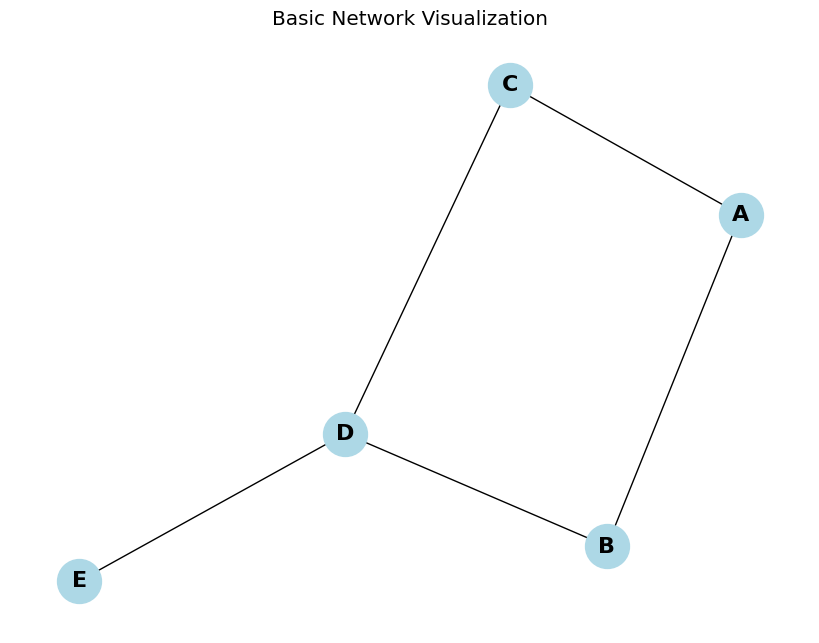

Number of nodes: 5
Number of edges: 5
Nodes: ['A', 'B', 'C', 'D', 'E']
Edges: [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E')]


In [2]:
# Step 1: Initialize an undirected graph
g = nx.Graph()  # For directed graph, use: nx.DiGraph()

# Step 2: Add nodes (can add one by one or from a list)
g.add_node("A")
g.add_nodes_from(["B", "C", "D", "E"])

# Step 3: Add edges (connections between nodes)
g.add_edge("A", "B")
g.add_edges_from([("A", "C"), ("B", "D"), ("C", "D"), ("D", "E")])

# Step 4: Basic visualization
plt.figure(figsize=(8, 6))
nx.draw(g, with_labels=True, node_color='lightblue',
        node_size=1000, font_size=16, font_weight='bold')
plt.title("Basic Network Visualization")
plt.show()

# Display basic network information
print(f"Number of nodes: {g.number_of_nodes()}")
print(f"Number of edges: {g.number_of_edges()}")
print(f"Nodes: {list(g.nodes())}")
print(f"Edges: {list(g.edges())}")

### Visualization Customization Parameters

**From Lecture 2**: "The next parameter provides the node color, and you can provide colors in different formats of hexadecimal or an array of colors for individual node customization."


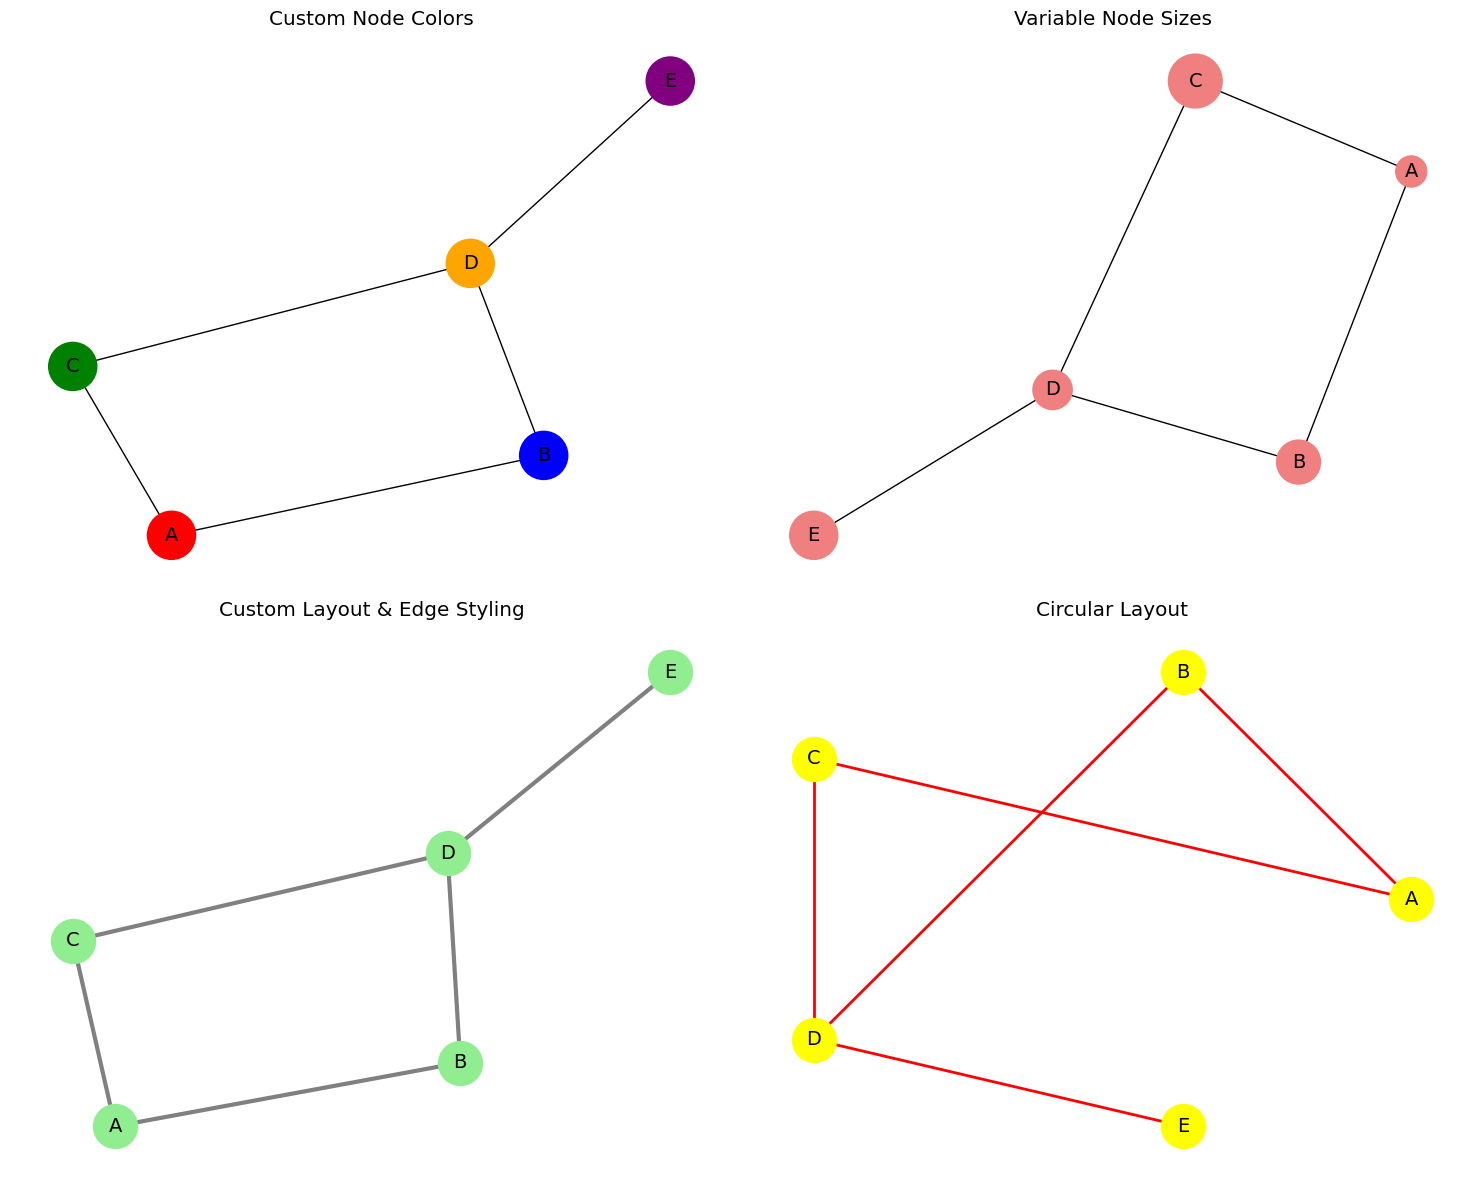

In [3]:
# Create a more complex example for customization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Different node colors (individual customization)
node_colors = ['red', 'blue', 'green', 'orange', 'purple']
nx.draw(g, ax=axes[0,0], with_labels=True, node_color=node_colors,
        node_size=1200, font_size=14)
axes[0,0].set_title("Custom Node Colors")

# 2. Different node sizes
node_sizes = [500, 1000, 1500, 800, 1200]  # Different sizes for each node
nx.draw(g, ax=axes[0,1], with_labels=True, node_color='lightcoral',
        node_size=node_sizes, font_size=14)
axes[0,1].set_title("Variable Node Sizes")

# 3. Custom layout with edge styling
pos = nx.spring_layout(g, seed=42)  # Fixed layout for consistency
nx.draw(g, pos=pos, ax=axes[1,0], with_labels=True,
        node_color='lightgreen', node_size=1000,
        edge_color='gray', width=3, font_size=14)
axes[1,0].set_title("Custom Layout & Edge Styling")

# 4. Different layout algorithm
pos_circular = nx.circular_layout(g)
nx.draw(g, pos=pos_circular, ax=axes[1,1], with_labels=True,
        node_color='yellow', node_size=1000,
        edge_color='red', width=2, font_size=14)
axes[1,1].set_title("Circular Layout")

plt.tight_layout()
plt.show()


## 3. Node & Edge Attributes

### Adding Metadata to Your Network

**From Lecture 2**: "Node attributes are useful for storing metadata about the nodes. For example, in a social network, nodes can represent people and their attributes can represent characteristics such as age, the role of that node, or gender."


In [5]:
# Create a social network example with attributes
social_net = nx.Graph()

# Add nodes with attributes (representing people)
social_net.add_node("Alice", age=25, role="leader", department="Engineering")
social_net.add_node("Bob", age=30, role="member", department="Marketing")
social_net.add_node("Carol", age=28, role="coordinator", department="Engineering")
social_net.add_node("David", age=35, role="manager", department="Sales")
social_net.add_node("Eve", age=22, role="intern", department="Engineering")

# Add edges with attributes (representing relationships)
social_net.add_edge("Alice", "Bob", interaction_frequency=5, relationship="collaboration")
social_net.add_edge("Alice", "Carol", interaction_frequency=8, relationship="mentorship")
social_net.add_edge("Bob", "David", interaction_frequency=3, relationship="project")
social_net.add_edge("Carol", "Eve", interaction_frequency=10, relationship="mentorship")
social_net.add_edge("Alice", "David", interaction_frequency=2, relationship="meeting")

# Accessing attributes
print("Node Attributes:")
print(f"Alice's role: {social_net.nodes['Alice']['role']}")
print(f"Bob's age: {social_net.nodes['Bob']['age']}")
print(f"Carol's department: {social_net.nodes['Carol']['department']}")

print("\nEdge Attributes:")
print(f"Alice-Carol relationship: {social_net.edges['Alice', 'Carol']['relationship']}")
print(f"Alice-Carol interaction frequency: {social_net.edges['Alice', 'Carol']['interaction_frequency']}")

# Display all node attributes
print("\nAll Node Attributes:")
for node, attrs in social_net.nodes(data=True):
    print(f"{node}: {attrs}")

print("\nAll Edge Attributes:")
for edge_data in social_net.edges(data=True):
    edge, attrs = edge_data[0:2], edge_data[2]
    print(f"{edge}: {attrs}")


Node Attributes:
Alice's role: leader
Bob's age: 30
Carol's department: Engineering

Edge Attributes:
Alice-Carol relationship: mentorship
Alice-Carol interaction frequency: 8

All Node Attributes:
Alice: {'age': 25, 'role': 'leader', 'department': 'Engineering'}
Bob: {'age': 30, 'role': 'member', 'department': 'Marketing'}
Carol: {'age': 28, 'role': 'coordinator', 'department': 'Engineering'}
David: {'age': 35, 'role': 'manager', 'department': 'Sales'}
Eve: {'age': 22, 'role': 'intern', 'department': 'Engineering'}

All Edge Attributes:
('Alice', 'Bob'): {'interaction_frequency': 5, 'relationship': 'collaboration'}
('Alice', 'Carol'): {'interaction_frequency': 8, 'relationship': 'mentorship'}
('Alice', 'David'): {'interaction_frequency': 2, 'relationship': 'meeting'}
('Bob', 'David'): {'interaction_frequency': 3, 'relationship': 'project'}
('Carol', 'Eve'): {'interaction_frequency': 10, 'relationship': 'mentorship'}


### Directed Graphs

**From Lecture 2**: "You can define your graph to be a directed graph by using the DiGraph, and then you're adding the edges that these are going to be then directed."


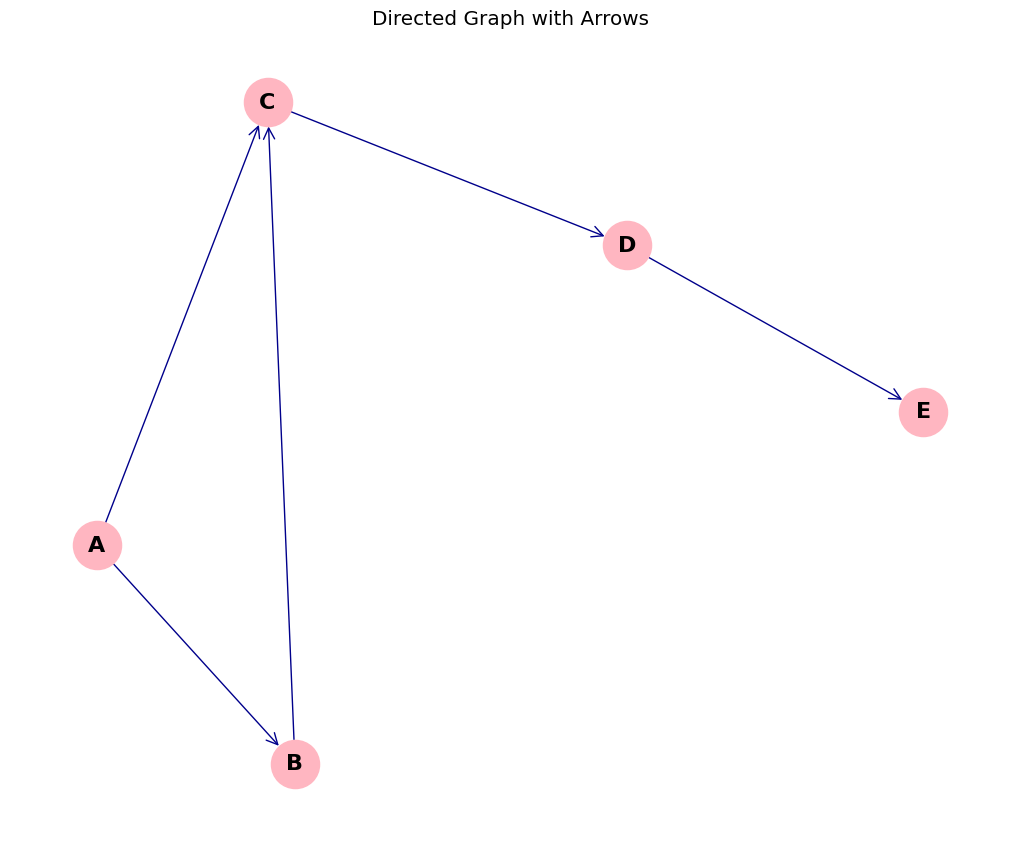

Directed Graph Information:
Nodes: ['A', 'B', 'C', 'D', 'E']
Edges (directed): [('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D'), ('D', 'E')]
In-degree of C: 2
Out-degree of A: 2


In [6]:
# Create a directed graph (DiGraph)
directed_g = nx.DiGraph()

# Add directed edges (A -> B means A is source, B is target)
directed_g.add_edges_from([("A", "B"), ("B", "C"), ("C", "D"), ("A", "C"), ("D", "E")])

# Visualize directed graph with arrows
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(directed_g, seed=42)

nx.draw(directed_g, pos=pos, with_labels=True,
        node_color='lightpink', node_size=1200,
        edge_color='darkblue', arrows=True,
        arrowsize=20, arrowstyle='->',
        font_size=16, font_weight='bold')

plt.title("Directed Graph with Arrows")
plt.show()

# Compare undirected vs directed information
print("Directed Graph Information:")
print(f"Nodes: {list(directed_g.nodes())}")
print(f"Edges (directed): {list(directed_g.edges())}")
print(f"In-degree of C: {directed_g.in_degree('C')}")  # How many edges come to C
print(f"Out-degree of A: {directed_g.out_degree('A')}")  # How many edges leave A


## 4. Network Analysis Integration

### Centrality Measures

**From Lecture 2**: "We can use NetworkX to analyze a network as well, using measures we learned in the prior module. For example, you can calculate degree centrality using the function degree centrality."


In [8]:
# Calculate different centrality measures for our social network
print("CENTRALITY ANALYSIS")
print("=" * 50)

# Degree Centrality - "Who knows the most people?"
degree_cent = nx.degree_centrality(social_net)
print("Degree Centrality (who knows most people):")
for node, centrality in sorted(degree_cent.items(), key=lambda x: x[1], reverse=True):
    print(f"  {node}: {centrality:.3f}")

# Closeness Centrality - "Who has shortest distance to others?"
closeness_cent = nx.closeness_centrality(social_net)
print("\nCloseness Centrality (shortest average distance):")
for node, centrality in sorted(closeness_cent.items(), key=lambda x: x[1], reverse=True):
    print(f"  {node}: {centrality:.3f}")

# Betweenness Centrality - "Who controls information flow?"
betweenness_cent = nx.betweenness_centrality(social_net)
print("\nBetweenness Centrality (controls information flow):")
for node, centrality in sorted(betweenness_cent.items(), key=lambda x: x[1], reverse=True):
    print(f"  {node}: {centrality:.3f}")

# Shortest path analysis
print("\n" + "=" * 50)
print("SHORTEST PATH ANALYSIS")
print("=" * 50)

# Shortest path between specific nodes
try:
    path = nx.shortest_path(social_net, "Alice", "Eve")
    print(f"Shortest path from Alice to Eve: {' -> '.join(path)}")
    print(f"Path length: {len(path) - 1} steps")
except nx.NetworkXNoPath:
    print("No path exists between Alice and Eve")

# All shortest paths
all_paths = dict(nx.all_pairs_shortest_path(social_net))
print("\nAll shortest paths from Alice:")
for target, path in all_paths["Alice"].items():
    if target != "Alice":
        print(f"  Alice to {target}: {' -> '.join(path)}")


CENTRALITY ANALYSIS
Degree Centrality (who knows most people):
  Alice: 0.750
  Bob: 0.500
  Carol: 0.500
  David: 0.500
  Eve: 0.250

Closeness Centrality (shortest average distance):
  Alice: 0.800
  Carol: 0.667
  Bob: 0.571
  David: 0.571
  Eve: 0.444

Betweenness Centrality (controls information flow):
  Alice: 0.667
  Carol: 0.500
  Bob: 0.000
  David: 0.000
  Eve: 0.000

SHORTEST PATH ANALYSIS
Shortest path from Alice to Eve: Alice -> Carol -> Eve
Path length: 2 steps

All shortest paths from Alice:
  Alice to Bob: Alice -> Bob
  Alice to Carol: Alice -> Carol
  Alice to David: Alice -> David
  Alice to Eve: Alice -> Carol -> Eve


## 5. Advanced Techniques with Real Data

### Loading Real-World Network Data

**From Lecture 3**: "We are going to use college football data. The data contains a network of American football colleges between the division IA colleges during regular season in fall 2000."

**Note**: The following demonstrates the data loading technique from the lectures. For this tutorial, we'll create a simulated dataset since the original URL may not be accessible.


In [9]:
# Advanced Data Loading Technique (from Lecture 3)
# This demonstrates the method used in the lectures for loading remote data

def simulate_college_football_network():
    """
    Create a simulated college football network to demonstrate the techniques
    from Lecture 3, since the original dataset URL may not be accessible.
    """
    # Create a network representing college football teams
    football_net = nx.Graph()

    # Add teams (nodes) with conference attributes
    teams = [
        ("Alabama", {"conference": "SEC", "region": "South"}),
        ("Michigan", {"conference": "Big Ten", "region": "Midwest"}),
        ("USC", {"conference": "Pac-12", "region": "West"}),
        ("Texas", {"conference": "Big 12", "region": "South"}),
        ("Ohio State", {"conference": "Big Ten", "region": "Midwest"}),
        ("Florida", {"conference": "SEC", "region": "South"}),
        ("Oregon", {"conference": "Pac-12", "region": "West"}),
        ("Oklahoma", {"conference": "Big 12", "region": "South"}),
        ("Penn State", {"conference": "Big Ten", "region": "East"}),
        ("Georgia", {"conference": "SEC", "region": "South"}),
    ]

    for team, attrs in teams:
        football_net.add_node(team, **attrs)

    # Add games (edges) - teams that played against each other
    games = [
        ("Alabama", "Florida"), ("Alabama", "Georgia"), ("Michigan", "Ohio State"),
        ("Michigan", "Penn State"), ("USC", "Oregon"), ("Texas", "Oklahoma"),
        ("Ohio State", "Penn State"), ("Florida", "Georgia"), ("USC", "Texas"),
        ("Oregon", "Oklahoma"), ("Alabama", "Texas"), ("Michigan", "USC"),
        ("Ohio State", "Alabama"), ("Florida", "Oregon"), ("Georgia", "Oklahoma")
    ]

    football_net.add_edges_from(games)
    return football_net

# Create the simulated network
football_graph = simulate_college_football_network()

print("COLLEGE FOOTBALL NETWORK ANALYSIS")
print("=" * 50)
print(f"Number of teams: {football_graph.number_of_nodes()}")
print(f"Number of games: {football_graph.number_of_edges()}")
print(f"Teams: {list(football_graph.nodes())}")

# Analyze conference distribution
conferences = {}
for team, attrs in football_graph.nodes(data=True):
    conf = attrs['conference']
    if conf not in conferences:
        conferences[conf] = []
    conferences[conf].append(team)

print("\nTeams by Conference:")
for conf, teams in conferences.items():
    print(f"  {conf}: {teams}")


COLLEGE FOOTBALL NETWORK ANALYSIS
Number of teams: 10
Number of games: 15
Teams: ['Alabama', 'Michigan', 'USC', 'Texas', 'Ohio State', 'Florida', 'Oregon', 'Oklahoma', 'Penn State', 'Georgia']

Teams by Conference:
  SEC: ['Alabama', 'Florida', 'Georgia']
  Big Ten: ['Michigan', 'Ohio State', 'Penn State']
  Pac-12: ['USC', 'Oregon']
  Big 12: ['Texas', 'Oklahoma']


### Dynamic Visualization with Centrality

**From Lecture 3**: "We can also use some of the network measures as a way of individualization. So for example, to show the degree centrality and the importance of a node represented by the size of the node."


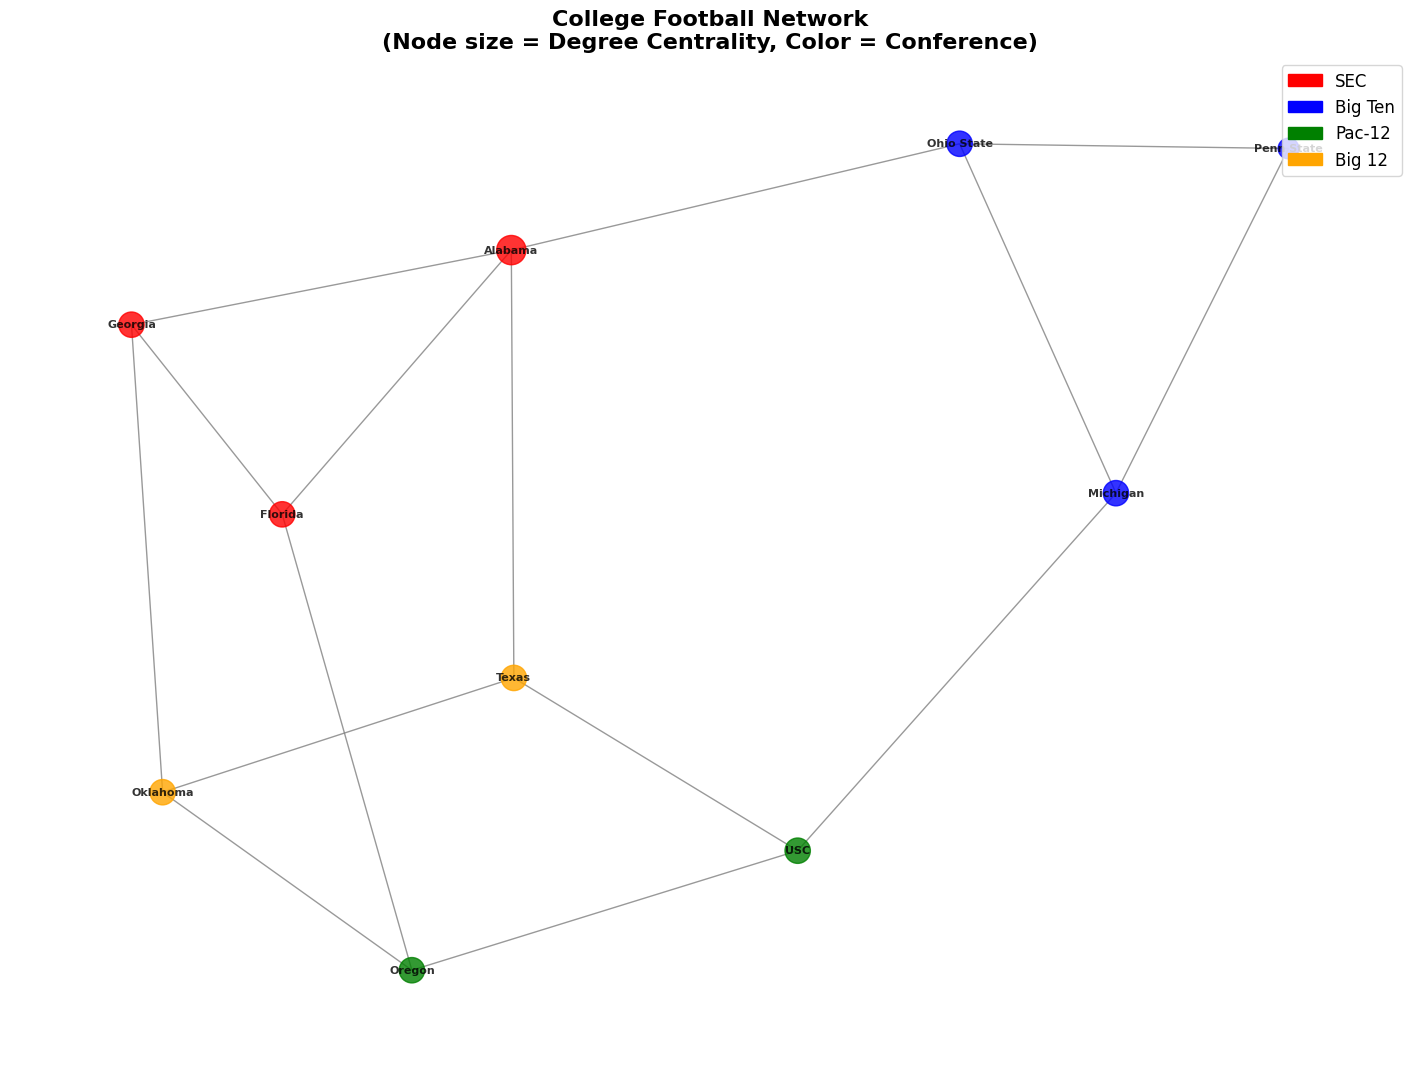


Degree Centrality Analysis (Most Connected Teams):
Alabama     : 0.444 (played 4 games)
Michigan    : 0.333 (played 3 games)
USC         : 0.333 (played 3 games)
Texas       : 0.333 (played 3 games)
Ohio State  : 0.333 (played 3 games)
Florida     : 0.333 (played 3 games)
Oregon      : 0.333 (played 3 games)
Oklahoma    : 0.333 (played 3 games)
Georgia     : 0.333 (played 3 games)
Penn State  : 0.222 (played 2 games)


In [10]:
# Calculate centrality for dynamic node sizing
centrality = nx.degree_centrality(football_graph)

# Create node sizes based on centrality (multiply by 1000 for visibility)
node_sizes = [centrality[node] * 1000 for node in football_graph.nodes()]

# Create node colors based on conference
conference_colors = {
    'SEC': 'red',
    'Big Ten': 'blue',
    'Pac-12': 'green',
    'Big 12': 'orange'
}

node_colors = [conference_colors[football_graph.nodes[node]['conference']]
               for node in football_graph.nodes()]

# Create visualization with force-directed layout
plt.figure(figsize=(14, 10))

# Use seed for reproducible layout (from Lecture 3)
pos = nx.spring_layout(football_graph, seed=42)

# Draw the network with dynamic sizing and coloring
nx.draw(football_graph, pos=pos,
        node_size=node_sizes,           # Size based on centrality
        node_color=node_colors,         # Color based on conference
        with_labels=True,
        font_size=8,
        font_weight='bold',
        edge_color='gray',
        alpha=0.8)

plt.title("College Football Network\n(Node size = Degree Centrality, Color = Conference)",
          fontsize=16, fontweight='bold')

# Create legend for conferences
import matplotlib.patches as mpatches
legend_elements = [mpatches.Patch(color=color, label=conf)
                   for conf, color in conference_colors.items()]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()

# Print centrality analysis
print("\nDegree Centrality Analysis (Most Connected Teams):")
print("=" * 50)
for team, cent in sorted(centrality.items(), key=lambda x: x[1], reverse=True):
    print(f"{team:12}: {cent:.3f} (played {football_graph.degree(team)} games)")


## 6. Layout Algorithms Comparison

### Different Layout Methods

**From Lecture 3**: "If you want to change the layout to a different layout, then you can basically just change this variable position here to be a circular layout or being a spectral layout."

Let's compare different layout algorithms with the same network:


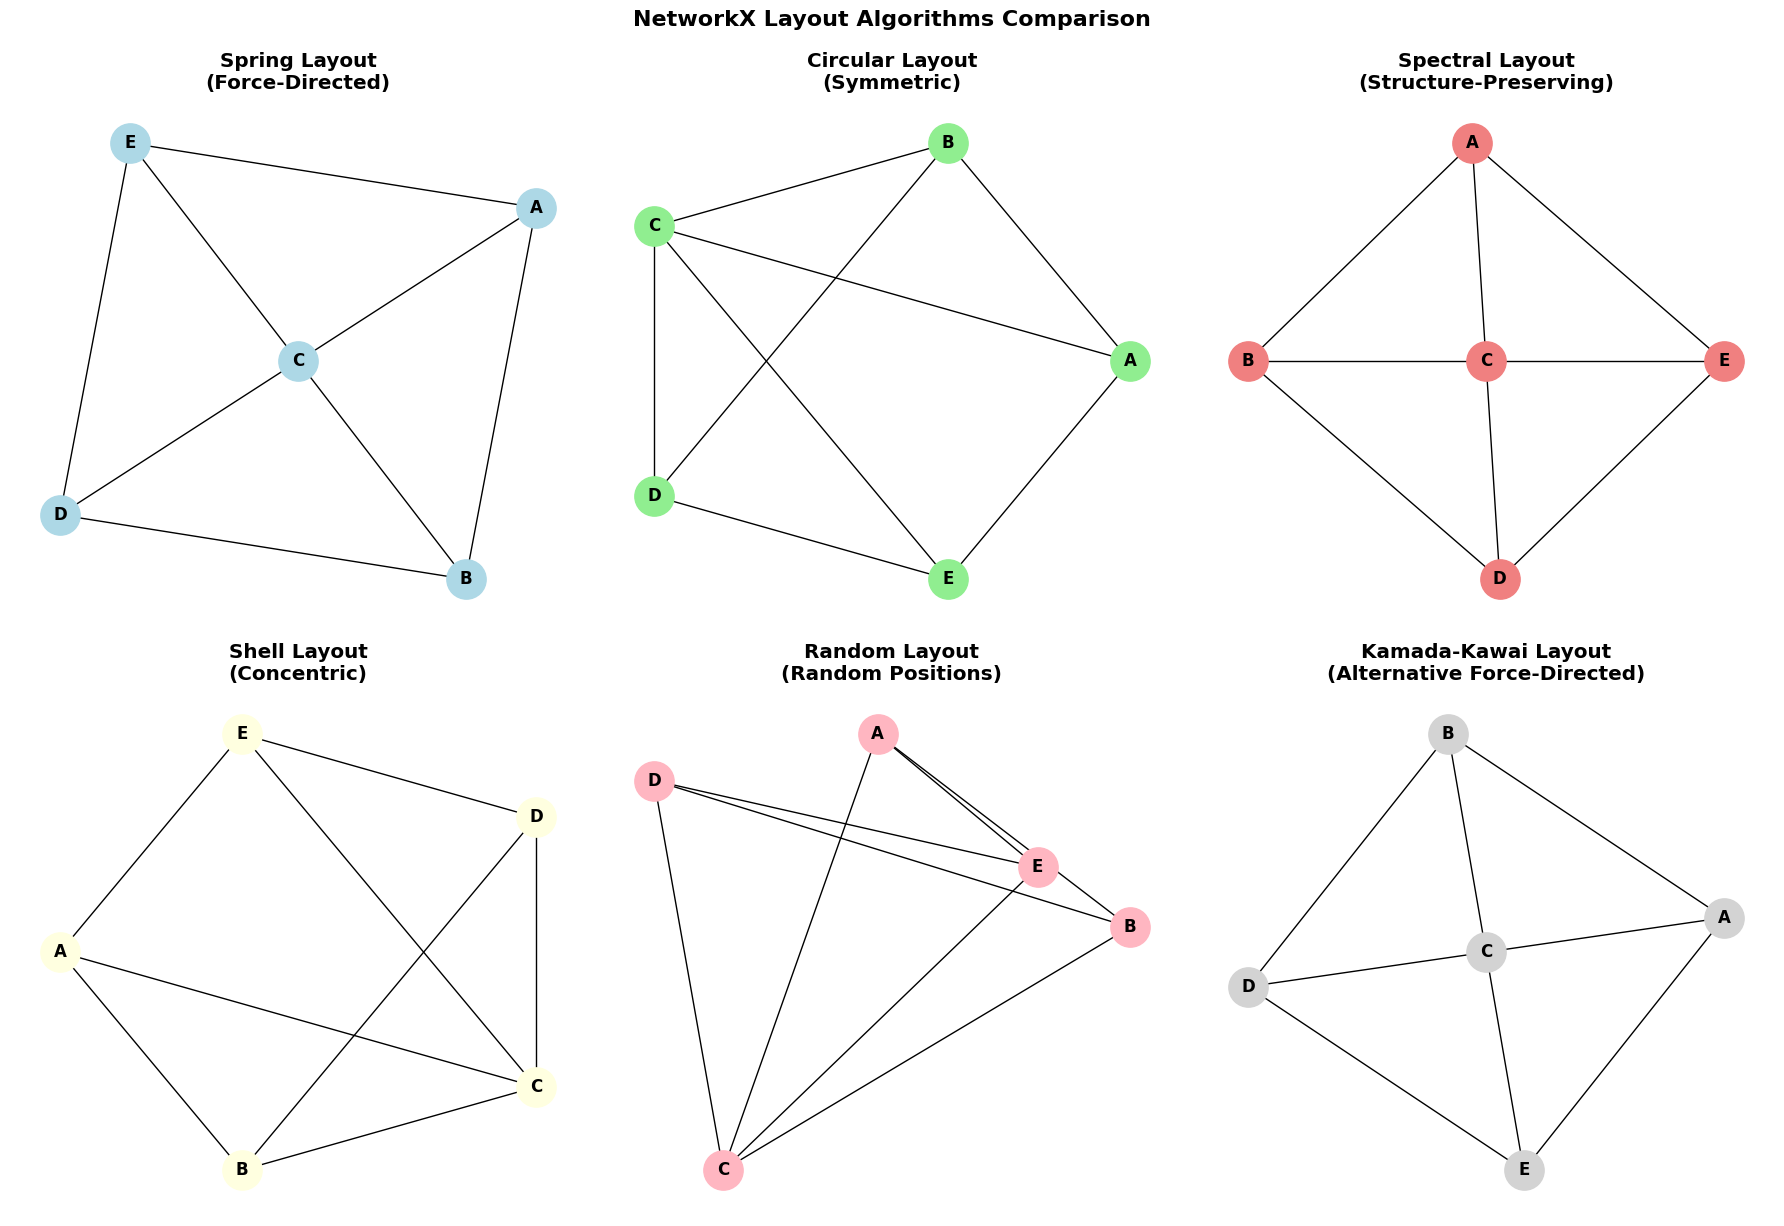

LAYOUT CHARACTERISTICS:
Spring Layout:    Good for general use, reveals communities
Circular Layout:  Neutral positioning, good for comparisons
Spectral Layout:  Structure-preserving, good for clusters
Shell Layout:     Concentric circles, hierarchical view
Random Layout:    Random positions, baseline comparison
Kamada-Kawai:     Alternative force-directed, minimizes stress


In [11]:
# Compare different layout algorithms
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Use a simpler network for better layout comparison
simple_net = nx.Graph()
simple_net.add_edges_from([("A", "B"), ("B", "C"), ("C", "D"), ("D", "E"),
                          ("E", "A"), ("A", "C"), ("B", "D"), ("E", "C")])

# Layout 1: Spring Layout (Force-Directed)
pos_spring = nx.spring_layout(simple_net, seed=42)
nx.draw(simple_net, pos=pos_spring, ax=axes[0,0], with_labels=True,
        node_color='lightblue', node_size=800, font_size=12, font_weight='bold')
axes[0,0].set_title("Spring Layout\n(Force-Directed)", fontweight='bold')

# Layout 2: Circular Layout
pos_circular = nx.circular_layout(simple_net)
nx.draw(simple_net, pos=pos_circular, ax=axes[0,1], with_labels=True,
        node_color='lightgreen', node_size=800, font_size=12, font_weight='bold')
axes[0,1].set_title("Circular Layout\n(Symmetric)", fontweight='bold')

# Layout 3: Spectral Layout
pos_spectral = nx.spectral_layout(simple_net)
nx.draw(simple_net, pos=pos_spectral, ax=axes[0,2], with_labels=True,
        node_color='lightcoral', node_size=800, font_size=12, font_weight='bold')
axes[0,2].set_title("Spectral Layout\n(Structure-Preserving)", fontweight='bold')

# Layout 4: Shell Layout
pos_shell = nx.shell_layout(simple_net)
nx.draw(simple_net, pos=pos_shell, ax=axes[1,0], with_labels=True,
        node_color='lightyellow', node_size=800, font_size=12, font_weight='bold')
axes[1,0].set_title("Shell Layout\n(Concentric)", fontweight='bold')

# Layout 5: Random Layout
pos_random = nx.random_layout(simple_net, seed=42)
nx.draw(simple_net, pos=pos_random, ax=axes[1,1], with_labels=True,
        node_color='lightpink', node_size=800, font_size=12, font_weight='bold')
axes[1,1].set_title("Random Layout\n(Random Positions)", fontweight='bold')

# Layout 6: Kamada-Kawai Layout (Alternative force-directed)
pos_kamada = nx.kamada_kawai_layout(simple_net)
nx.draw(simple_net, pos=pos_kamada, ax=axes[1,2], with_labels=True,
        node_color='lightgray', node_size=800, font_size=12, font_weight='bold')
axes[1,2].set_title("Kamada-Kawai Layout\n(Alternative Force-Directed)", fontweight='bold')

plt.tight_layout()
plt.suptitle("NetworkX Layout Algorithms Comparison", fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Layout characteristics explanation
print("LAYOUT CHARACTERISTICS:")
print("=" * 60)
print("Spring Layout:    Good for general use, reveals communities")
print("Circular Layout:  Neutral positioning, good for comparisons")
print("Spectral Layout:  Structure-preserving, good for clusters")
print("Shell Layout:     Concentric circles, hierarchical view")
print("Random Layout:    Random positions, baseline comparison")
print("Kamada-Kawai:     Alternative force-directed, minimizes stress")


## Summary and Key Takeaways

### What We've Learned from Module 8

1. **NetworkX Fundamentals**
   - Graph creation (Graph, DiGraph, MultiGraph)
   - Node and edge management
   - Attribute systems for metadata

2. **Visualization Techniques**
   - Basic plotting with customization
   - Layout algorithms and their applications
   - Dynamic visual encoding (size, color)

3. **Network Analysis Integration**
   - Centrality measures (degree, closeness, betweenness)
   - Shortest path calculations
   - Real-world data applications

4. **Advanced Data Handling**
   - Remote data loading techniques
   - File format processing (GML, JSON)
   - In-memory data management

### Key NetworkX Functions Covered

```python
# Graph Creation
nx.Graph(), nx.DiGraph()
g.add_node(), g.add_nodes_from()
g.add_edge(), g.add_edges_from()

# Visualization
nx.draw(), nx.spring_layout(), nx.circular_layout()
nx.spectral_layout(), nx.shell_layout()

# Analysis
nx.degree_centrality(), nx.closeness_centrality()
nx.betweenness_centrality(), nx.shortest_path()

# Data I/O
nx.parse_gml(), nx.write_gml()
```

### Next Steps

- **Module 9**: Time Series Visualization
- **Practice**: Try creating networks from your own data
- **Explore**: NetworkX documentation for advanced algorithms
- **Apply**: Use these techniques in research or projects

---

**Reference**: This tutorial is based on Module 8 lectures from "The Art of Data Visualization" course, covering NetworkX theory and practical implementation.
